<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-и-предобработка-данных" data-toc-modified-id="Общая-информация-и-предобработка-данных-1">Общая информация и предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1">Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации" data-toc-modified-id="Общий-вывод-и-рекомендации-4">Общий вывод и рекомендации</a></span></li></ul></div>

# Анализ ассортимента товаров


- Презентация  https://drive.google.com/file/d/1PT-J2la-NgPP8jenssgtARFdRSfZllPP/view?usp=sharing

- Дашборд https://public.tableau.com/views/-_16256591034220/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

Интернет-магазин товаров для дома «Пока все ещё тут". Цель -  помочь магазину стать лучше, а клиентам — обустроить дом своей мечты. Задача — анализ товарного ассортимента. «Пока все ещё тут» — мы создаём уют!
Для анализа предоставлен датасет с транзакциями интернет-магазина, где:
- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара в заказе;
- price — цена товара.

## Общая информация и предобработка данных

Импортируем необходимые для работы библиотеки. 

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
import scipy.stats as stats

Откроем файлы и изучим общую информацию.

In [88]:
orders = pd.read_csv('/datasets/ecommerce_dataset.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [89]:
pd.set_option('display.max_colwidth', -1 )
orders.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


В таблице 6 колонок и 6737 строк. Пропусков нет. Даты импортированы в неверном формате, преобразуем в datetime.

In [90]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y%m%d%H')
orders.tail()

,date,customer_id,order_id,product,quantity,price
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6736,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0


Завершая предобработку данных, проведем проверку на дубликаты.

In [91]:
orders[orders.duplicated()]

,date,customer_id,order_id,product,quantity,price


Дубликатов не обнаружено.

Добавим в таблицу столбцы: со стоимостью позиции

In [92]:
orders['product_value'] = orders['quantity'] * orders['price']
orders.tail()

,date,customer_id,order_id,product,quantity,price,product_value
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,397.0
6736,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0


И со стоимостью всего заказа

In [93]:
order_value = orders.groupby('order_id')['product_value'].sum().reset_index()
order_value.columns = ['order_id', 'order_value']
order_value.sample(5)

,order_id,order_value
940,69540,149.0
2310,72256,116.0
1320,70340,492.0
2122,71911,412.0
302,14946,376.0


In [94]:
orders = orders.merge(order_value, on = 'order_id', how = 'left')
orders.tail()

,date,customer_id,order_id,product,quantity,price,product_value,order_value
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,404.0,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,157.0,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,397.0,397.0
6736,2019-10-31 16:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,2174.0


### Вывод

В ходе предобработки данных мы заменили формат данных, провели проверку на дубликаты и добавили рассчетные столбцы. Датасет готов к дальнейшему анализу.

## Исследовательский анализ данных

Посмотрим данные за какой период предоставлены в датафрейме

In [95]:
print('Минимальная дата в данных {}.'.format(orders['date'].min()))

Минимальная дата в данных 2018-10-01 00:00:00.


In [96]:
print('Максимальная дата в данных {}.'.format(orders['date'].max()))

Максимальная дата в данных 2019-10-31 16:00:00.


Построим распределение количества заказов по часам

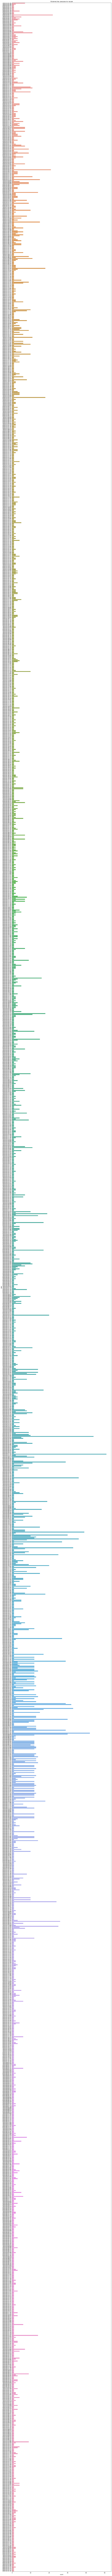

In [97]:
plt.figure(figsize=(15, 400))
ax = sns.countplot(y=orders['date'].dt.strftime('%Y-%m-%d %H'), data=orders)
ax.set_title('Количество заказов по часам')
plt.show()

По графику видно, что пропусков в датах нет. Наблюдается увеличение числа заказов с конца апреля по июнь.

Проведем проверку на скрытые дубликаты. Так как в наших данных присутсвует индентификатор заказа, его номер, проверим нет ли дубликатов по нему. Для этого удалим колонку с датой и номером клиента. 

In [98]:
orders_o = orders.drop(['date','customer_id'], axis = 1)
orders[orders_o.duplicated()]

,date,customer_id,order_id,product,quantity,price,product_value,order_value
58,2018-10-02 18:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0,3299.0,16495.0
59,2018-10-02 19:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0,3299.0,16495.0
60,2018-10-02 20:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0,3299.0,16495.0
63,2018-10-03 04:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0,3299.0,16495.0
94,2018-10-04 13:00:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0,1409.0,2818.0
...,...,...,...,...,...,...,...,...
6706,2019-10-28 10:00:00,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,1087.0,65220.0
6711,2019-10-28 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73108,Мирт d-9 см h-15 см,1,134.0,134.0,268.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,397.0,1191.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,397.0,1191.0


1897 повторяющихся строк. Один и тот же заказ не может быть оформлен в разные даты или разными людьми. Вероятно произошел сбой в системе. Удалим дубликаты.

In [99]:
orders_o = orders_o.drop_duplicates()
orders_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 6735
Data columns (total 6 columns):
order_id         4840 non-null int64
product          4840 non-null object
quantity         4840 non-null int64
price            4840 non-null float64
product_value    4840 non-null float64
order_value      4840 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 264.7+ KB


В данных осталось 4840 строк. Восстановливать столбцы с id клиента и датой не будем. Так как индентификатор клиента для текущего исследования не нужен, а для восстановления даты важно понимать, что за сбой произошел. Какую именно дату восстанавливать минимальную, максимальную или другую? К тому же, как показал график сезонность товаров выражена в апреле-июне. Для определения товарного ассортимента на июль-август можно обойтись без данных о датах.

Посмотрим как распределены данные.

In [100]:
orders_o.describe()

,order_id,quantity,price,product_value,order_value
count,4840.000000,4840.000000,4840.000000,4840.000000,4840.000000
mean,48110.605992,2.815702,514.925413,850.548347,2692.491736
std,27362.542193,17.637293,945.454941,9840.403436,13286.064219
min,12624.000000,1.000000,9.000000,9.000000,14.000000
25%,14773.250000,1.000000,90.000000,120.000000,502.000000
50%,68854.000000,1.000000,150.000000,194.000000,1049.000000
75%,70812.500000,1.000000,488.000000,734.000000,2099.750000
max,73164.000000,1000.000000,14917.000000,675000.000000,675000.000000


Есть товары которые покупали много в одном заказе, а так же дорогие товары. Построим боксплоты количества товаров и цены

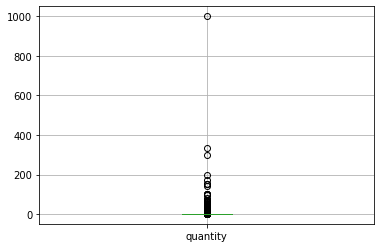

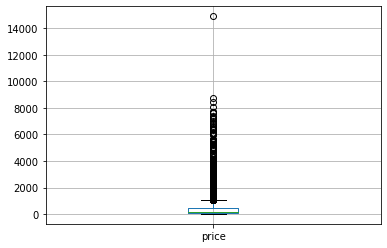

In [101]:
for i in ['quantity', 'price']:
    orders_o.boxplot(column = i, grid = True) 
    plt.show()

По графикам видно, что в данных есть выбросы. Посмотрим на них. Что бы увидеть всю информацию, в том числе о дате и покупателе, возьмем данные из изначального датасета.

In [102]:
orders.query('quantity > 200 or price >14000')

,date,customer_id,order_id,product,quantity,price,product_value,order_value
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,15300.0,15300.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,49432.0,49432.0
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0,675000.0,675000.0
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0,14917.0,14917.0


Передадим данные о покупателях, покупающих много одинаковых товаров, и покупателе, купившим дорогой товар, в отдел маркетинга, для проработки. Для текущего исследования уберем информацию о заказах, что бы не искажать метрики. 
После дополнительной проверки данных заказов(нет ли ошибки в заказе, разовая или постоянная потребность и тд) товары из них вручную добавим в нужную категорию. 

In [103]:
orders_o = orders_o.query('quantity < 200 and price < 14000')
orders_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 6735
Data columns (total 6 columns):
order_id         4835 non-null int64
product          4835 non-null object
quantity         4835 non-null int64
price            4835 non-null float64
product_value    4835 non-null float64
order_value      4835 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 264.4+ KB


Построим гистограммы по очищенным данным

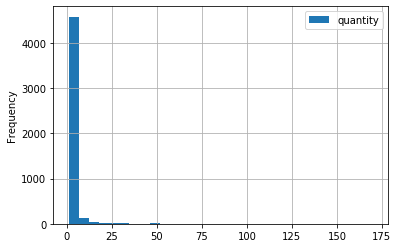

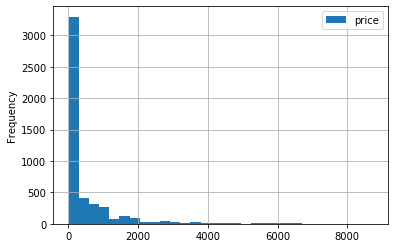

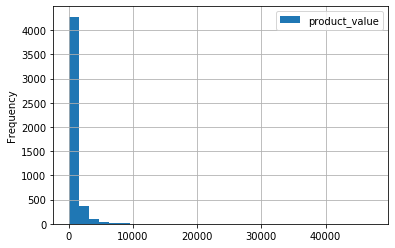

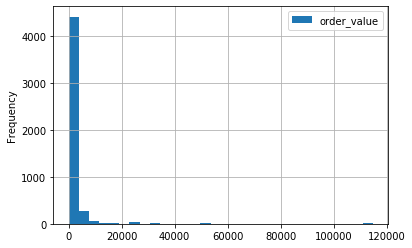

In [104]:
for i in ['quantity', 'price', 'product_value', 'order_value']:
    orders_o[i].plot(kind = 'hist',  grid = True, label = i, bins = 30) 
    plt.legend()
    plt.show()

По графикам видно, что большинство товаров имеют невысокую цену и небольшое количество штук в заказе, при этом есть небольшая часть дорогих заказов. 

Посчитаем сколько наименований товаров есть в наших данных.

In [105]:
orders_o['product'].nunique()

2340

2340 уникальных товаров. Разделим товары по категориям:
- интерьер	
- посуда	
- растения	
- тележки	
- хранение	
- чистота

Сформируем список 50-ти самых часто продаваемых товаров

In [106]:
top_50 = orders_o.groupby('product')['quantity'].sum().reset_index().sort_values(by = 'quantity', ascending = False).head(50)
top_50.head()

,product,quantity
835,Муляж ЯБЛОКО 9 см красное,318
837,Муляж Яблоко зеленый 9 см полиуретан,188
663,"Крепеж для пружины дверной, 1107055",170
1114,Плечики пластмассовые Размер 52 - 54 Тула 1205158,160
1199,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150


Выделим леммы из названия товара

In [107]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_50['product'].unique()))
Counter(lemmas)

Counter({'муляж': 7,
         ' ': 337,
         'яблоко': 5,
         '9': 3,
         'см': 22,
         'красный': 4,
         'зеленый': 1,
         'полиуретан': 6,
         'крепеж': 2,
         'для': 6,
         'пружина': 4,
         'дверной': 3,
         ', ': 15,
         '1107055': 1,
         'плечики': 2,
         'пластмассовый': 2,
         'размер': 1,
         '52': 1,
         ' - ': 1,
         '54': 1,
         'тула': 1,
         '1205158': 1,
         '240': 1,
         'мм': 5,
         'оцинковывать': 2,
         ' (': 3,
         'д': 1,
         '-': 18,
         '19': 1,
         ') ': 2,
         'без': 2,
         'крепление': 1,
         '1107014': 1,
         'банан': 1,
         'желтый': 2,
         '21': 1,
         'щетка': 5,
         'сметка': 1,
         '4': 2,
         'х': 3,
         'рядная': 1,
         'деревянный': 3,
         '300': 1,
         'фигурный': 1,
         'ручка': 4,
         'ворс': 1,
         '5': 7,
         ',': 6,
    

Добавим столбец с леммами в таблицу

In [108]:
orders_o['lem'] = orders_o['product'].apply(m.lemmatize)
orders_o.tail(5)

,order_id,product,quantity,price,product_value,order_value,lem
6731,73155,Мимоза стыдливая d-9 см,1,329.0,329.0,329.0,"[мимоза, , стыдливый, , d, -, 9, , см, \n]"
6732,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,404.0,404.0,"[таз, , пластмассовый, , 40, ,, 0, , л, , пищевой, , овальный, (, Иж, ), , 1404094, \n]"
6733,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,1087.0,1087.0,"[сумка, -, тележка, , 2, -, х, , колесный, , Gimi, , Argo, , синий, \n]"
6734,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,157.0,157.0,"[герань, , домашний, (, пеларгония, , зональный, ) , цвести, , D12, , , H25, -, 30, , , малиновый, , с, , красный, , , полумахровый, \n]"
6735,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,397.0,397.0,"[таз, , пластмассовый, , со, , стиральный, , доска, (, Иж, ), , 1404021, \n]"


Разобьем товары по категориям по ключевым словам - леммам и составим словарь.

In [109]:
classification_dict = {
    'интерьер': ['муляж', 'крепеж','искусственный','коврик'], 
    'чистота': ['мытье', 'ерш','щетка','ковш','таз','ведро'],
    'посуда': ['нож', 'тарелка'], 
    'растения': ['рассада','кассета','сорт','гвоздик','пеларгония','розебудный','черенок','подснежник','растение','укоренять'],
    'хранение': ['вешалка','крючок'],
    'тележки': ['тележка','сумка'],
}

Создадим функцию для присвоения категории по словарю

In [110]:
def product_category(product):
        for category, items_list in classification_dict.items():
            for item in items_list:
                if item in product:
                    return category
        return 'БЕЗ КАТЕГОРИИ'

In [111]:
orders_o['category'] = orders_o['lem'].apply(product_category)
orders_0 = orders_o.query('category != "БЕЗ КАТЕГОРИИ"')
orders_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745 entries, 0 to 6735
Data columns (total 8 columns):
order_id         2745 non-null int64
product          2745 non-null object
quantity         2745 non-null int64
price            2745 non-null float64
product_value    2745 non-null float64
order_value      2745 non-null float64
lem              2745 non-null object
category         2745 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 193.0+ KB


Для 2745 товаров определена категория. Продолжим.

Выделим из данных неразмеченные товары и снова выведем 50 самых популярных.

In [112]:
orders_l = orders_o.query('category == "БЕЗ КАТЕГОРИИ"')
top_40 = orders_l.groupby('product')['quantity'].sum().reset_index().sort_values(by = 'quantity', ascending = False).head(50)
top_40.head()

,product,quantity
645,Плечики пластмассовые Размер 52 - 54 Тула 1205158,160
722,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150
1273,"Шпингалет 80 мм белый с пружиной, 1102188",100
948,"Стяжка оконная с болтом СТ-55 цинк, 1108354",100
601,"Петля приварная гаражная d 14х90 мм с шаром, 1103003",90


Выделим леммы и создадим словарь

In [113]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_40['product'].unique()))
Counter(lemmas)

Counter({'плечики': 1,
         ' ': 391,
         'пластмассовый': 2,
         'размер': 1,
         '52': 1,
         ' - ': 1,
         '54': 1,
         'тула': 1,
         '1205158': 1,
         'пружина': 2,
         'дверной': 1,
         '240': 1,
         'мм': 7,
         'оцинковывать': 1,
         ' (': 2,
         'д': 1,
         '-': 21,
         '19': 1,
         ') ': 2,
         'без': 1,
         'крепление': 1,
         ', ': 32,
         '1107014': 1,
         'шпингалет': 1,
         '80': 1,
         'белый': 6,
         'с': 13,
         '1102188': 1,
         'стяжка': 1,
         'оконный': 2,
         'болт': 1,
         'ст': 1,
         '55': 1,
         'цинк': 1,
         '1108354': 1,
         'петля': 1,
         'приварной': 1,
         'гаражный': 1,
         'd': 8,
         '14х90': 1,
         'шар': 2,
         '1103003': 1,
         'салфетка': 7,
         'Protec': 2,
         'Textil': 2,
         'Polyline': 1,
         '30х43': 2,
         'с

In [114]:
classification_dict = {
    'интерьер': ['белье','декоративный','искуственный','композиция','полотенце','простыня','крепеж','карниз'], 
    'чистота': ['салфетка','сушилка','гладильный','веник','мусор'],
    'посуда': ['Luminarc','посуда','емкость','блюдце','половник','нож','кружка'], 
    'растения': ['плантация','спатифиллум','циперус','зумула','бакоп','калибрахоа','базилик','арбуз','роза','тимьян','эхинокактус','петуния','тюльпан','лобелия','эпипремнум'],
    'хранение': ['плечики'],
}

In [115]:
orders_l['category'] = orders_l['lem'].apply(product_category)
orders_1 = orders_l.query('category != "БЕЗ КАТЕГОРИИ"')
orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 4 to 6725
Data columns (total 8 columns):
order_id         956 non-null int64
product          956 non-null object
quantity         956 non-null int64
price            956 non-null float64
product_value    956 non-null float64
order_value      956 non-null float64
lem              956 non-null object
category         956 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 67.2+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Для ещё 956 товаров определена категория. Снова выделим из данных неразмеченные товары и выведем 50 самых популярных.

In [116]:
orders_s = orders_l.query('category == "БЕЗ КАТЕГОРИИ"')
top_30 = orders_s.groupby('product')['quantity'].sum().reset_index().sort_values(by = 'quantity', ascending = False).head(50)
top_30.head()

,product,quantity
459,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150
763,"Шпингалет 80 мм белый с пружиной, 1102188",100
597,"Стяжка оконная с болтом СТ-55 цинк, 1108354",100
397,"Петля приварная гаражная d 14х90 мм с шаром, 1103003",90
748,Чехол для одежды объемный Hausmann с овальным окном ПВХ и ручками 60х140х10 см черный HM-701403AG,25


Выделим леммы и создадим словарь

In [117]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_30['product'].unique()))
Counter(lemmas)

Counter({'пружина': 2,
         ' ': 360,
         'дверной': 1,
         '240': 1,
         'мм': 11,
         'оцинковывать': 2,
         ' (': 1,
         'д': 1,
         '-': 21,
         '19': 1,
         ') ': 1,
         'без': 1,
         'крепление': 1,
         ', ': 34,
         '1107014': 1,
         'шпингалет': 1,
         '80': 1,
         'белый': 6,
         'с': 11,
         '1102188': 1,
         'стяжка': 1,
         'оконный': 2,
         'болт': 1,
         'ст': 1,
         '55': 1,
         'цинк': 1,
         '1108354': 1,
         'петля': 1,
         'приварной': 1,
         'гаражный': 1,
         'd': 5,
         '14х90': 1,
         'шар': 2,
         '1103003': 1,
         'чехол': 4,
         'для': 6,
         'одежда': 1,
         'объемный': 1,
         'Hausmann': 2,
         'овальный': 1,
         'окно': 1,
         'пвх': 1,
         'и': 1,
         'ручка': 1,
         '60х140х10': 1,
         'см': 17,
         'черный': 1,
         'HM': 1,


In [118]:
classification_dict = {
    'интерьер': ['скатерть','штора','наматрацник','новогодний'], 
    'чистота': ['корыто','микрофибры','совок','стремянка','уголок'],
    'посуда': ['стеклянный','ложка','банка','стакан'], 
    'растения': ['вербена','дыня','крупноцветковый','камнеломка','эхеверие','ранункулус','почвопокровный','примула','эвкалипт','овсянница',
                 'папоротник','дендробиум','вербейник','хоста','хлорофитум'],
    'хранение': ['чехол','хранение','плечики'],
}

In [119]:
orders_s['category'] = orders_s['lem'].apply(product_category)
orders_2 = orders_s.query('category != "БЕЗ КАТЕГОРИИ"')
orders_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 12 to 6723
Data columns (total 8 columns):
order_id         390 non-null int64
product          390 non-null object
quantity         390 non-null int64
price            390 non-null float64
product_value    390 non-null float64
order_value      390 non-null float64
lem              390 non-null object
category         390 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 27.4+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Ещё 390 товаров теперь с категорией. Снова выделим из данных неразмеченные товары и выведем 50 самых популярных.Затем выделим леммы и на их основе разделим товары по категориям

In [120]:
orders_z = orders_s.query('category == "БЕЗ КАТЕГОРИИ"')
top_20 = orders_z.groupby('product')['quantity'].sum().reset_index().sort_values(by = 'quantity', ascending = False).head(50)
top_20.head()

,product,quantity
361,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",150
433,"Стяжка оконная с болтом СТ-55 цинк, 1108354",100
566,"Шпингалет 80 мм белый с пружиной, 1102188",100
313,"Петля приварная гаражная d 14х90 мм с шаром, 1103003",90
104,"Завертка форточная белая/антик с полимерным покрытием *Тонар*, 1108287",22


In [121]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_20['product'].unique()))
Counter(lemmas)

Counter({'пружина': 2,
         ' ': 363,
         'дверной': 1,
         '240': 1,
         'мм': 8,
         'оцинковывать': 1,
         ' (': 2,
         'д': 1,
         '-': 20,
         '19': 1,
         ') ': 2,
         'без': 1,
         'крепление': 1,
         ', ': 29,
         '1107014': 1,
         'стяжка': 1,
         'оконный': 1,
         'с': 11,
         'болт': 1,
         'ст': 1,
         '55': 1,
         'цинк': 1,
         '1108354': 1,
         'шпингалет': 1,
         '80': 1,
         'белый': 9,
         '1102188': 1,
         'петля': 1,
         'приварной': 1,
         'гаражный': 1,
         'd': 12,
         '14х90': 1,
         'шар': 2,
         '1103003': 1,
         'завертка': 1,
         'форточный': 1,
         '/': 3,
         'антик': 1,
         'полимерный': 1,
         'покрытие': 1,
         ' *': 1,
         'тонар': 1,
         '*, ': 1,
         '1108287': 1,
         'фиксатор': 1,
         'хромой': 1,
         'большой': 2,
        

In [122]:
classification_dict = {
    'интерьер': ['штанга','полка'], 
    'чистота': ['перчатка','мыло','подрукавник','штангенциркуль','прищепок','сварка','урна','микрофибра','веревка','отбеливатель'],
    'посуда': ['блюдо','вилка','миска','салатник','кувшин'], 
    'растения': ['горшок','фиалка','мединилла','котовник','драцена','мимоза','чабер','ясколка','хризантема','цинния','виноград','кофе',
                 'розмарин','барвинок','колокольчик','фуксия','каланхое','кашпо','пуансеттия'],
    'хранение': ['подставка'],
}

In [123]:
orders_z['category'] = orders_z['lem'].apply(product_category)
orders_3 = orders_z.query('category != "БЕЗ КАТЕГОРИИ"')
orders_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 46 to 6731
Data columns (total 8 columns):
order_id         245 non-null int64
product          245 non-null object
quantity         245 non-null int64
price            245 non-null float64
product_value    245 non-null float64
order_value      245 non-null float64
lem              245 non-null object
category         245 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 17.2+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


На данном шаге удалось разметить 245 товаров. 

Теперь сформируем 50 самых дорогих, не размеченных товаров

In [124]:
orders_h = orders_z.query('category == "БЕЗ КАТЕГОРИИ"')
top = orders_h.groupby('product')['price'].max().reset_index().sort_values(by = 'price', ascending = False).head(50)
top.head()

,product,price
257,Покрывало жаккард KARNA стеганое KALVEN 260x260 см наволочки 50х70 см 2 шт 8681914002162,6134.0
187,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,5512.0
196,Набор инструментов в алюминиевом кейсе на колесиках с ручкой КУЗЬМИЧ 187 предметов НИК-001/187,5399.0
258,Покрывало жаккард шенилл BIRHOME VALENTIN 240х260 см наволочки 50х70 см 2 шт 9234567089661,4859.0
220,"Одеяло Wellness 1410 пуховое белое, 100% белый пух 500 гр, 140х200 см, 4607101064199",4724.0


Выделим леммы и составим словарь

In [125]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top['product'].unique()))
Counter(lemmas)

Counter({'покрывало': 4,
         ' ': 405,
         'жаккард': 2,
         'KARNA': 3,
         'стеганый': 3,
         'KALVEN': 1,
         '260x260': 1,
         'см': 21,
         'наволочка': 2,
         '50х70': 2,
         '2': 4,
         'шт': 2,
         '8681914002162': 1,
         'мусорный': 3,
         'контейнер': 3,
         'Hailo': 2,
         'BigBin': 1,
         'Swing': 1,
         '45': 2,
         '0845': 1,
         '-': 25,
         '010': 1,
         'л': 8,
         'хром': 1,
         'набор': 3,
         'инструмент': 1,
         'в': 5,
         'алюминиевый': 5,
         'кейс': 1,
         'на': 2,
         'колесико': 1,
         'с': 7,
         'ручка': 2,
         'кузьмич': 1,
         '187': 2,
         'предмет': 3,
         'ник': 1,
         '001': 1,
         '/': 6,
         'шенилл': 1,
         'BIRHOME': 1,
         'VALENTIN': 1,
         '240х260': 1,
         '9234567089661': 1,
         'одеяло': 1,
         'Wellness': 3,
         '1

In [126]:
classification_dict = {
    'интерьер': ['покрывало','наволочка','ковер','обувь','Wellness','жаккард','халат','напольный'], 
    'чистота': ['швабра','хозяйственный','пол','пылесос','мешок','пыль','Hausmann'],
    'посуда': ['термокружок','мантоварка','пароварка','соковарка','кастрюля','столовый','хозлэнд','WEBBER','кухонный'], 
    'хранение': ['комод'],
}

In [127]:
orders_h['category'] = orders_h['lem'].apply(product_category)
orders_4 = orders_h.query('category != "БЕЗ КАТЕГОРИИ"')
orders_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 57 to 6713
Data columns (total 8 columns):
order_id         96 non-null int64
product          96 non-null object
quantity         96 non-null int64
price            96 non-null float64
product_value    96 non-null float64
order_value      96 non-null float64
lem              96 non-null object
category         96 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 6.8+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Размечено 96 товаров. Повторим операции. 

In [128]:
orders_q= orders_h.query('category == "БЕЗ КАТЕГОРИИ"')
top_1 = orders_q.groupby('product')['price'].max().reset_index().sort_values(by = 'price', ascending = False).head(50)
top_1.head()

,product,price
157,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,5512.0
166,Набор инструментов в алюминиевом кейсе на колесиках с ручкой КУЗЬМИЧ 187 предметов НИК-001/187,5399.0
322,Цитрофортунелла Кумкват штамбовая d-21 см h-75 см,3074.0
158,Мусорный контейнер Hailo ProfiLine SoLid 14 0514-089 14 л белый,2549.0
287,"Фал капроновый 6 мм в бухте 300м Т-1, 1201050",2099.0


In [129]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_1['product'].unique()))
Counter(lemmas)

Counter({'мусорный': 3,
         ' ': 430,
         'контейнер': 3,
         'Hailo': 2,
         'BigBin': 1,
         'Swing': 1,
         '45': 3,
         '0845': 1,
         '-': 43,
         '010': 1,
         'л': 15,
         'хром': 1,
         'набор': 2,
         'инструмент': 1,
         'в': 4,
         'алюминиевый': 5,
         'кейс': 1,
         'на': 3,
         'колесико': 1,
         'с': 12,
         'ручка': 5,
         'кузьмич': 1,
         '187': 2,
         'предмет': 1,
         'ник': 1,
         '001': 1,
         '/': 10,
         'цитрофортунелла': 1,
         'кумкват': 1,
         'штамбовый': 1,
         'd': 7,
         '21': 1,
         'см': 20,
         'h': 3,
         '75': 1,
         'ProfiLine': 1,
         'SoLid': 1,
         '14': 2,
         '0514': 1,
         '089': 1,
         'белый': 9,
         'фал': 1,
         'капроновый': 1,
         '6': 3,
         'мм': 1,
         'бухта': 1,
         '300м': 1,
         'т': 1,
         '1'

In [130]:
classification_dict = {
    'интерьер': ['плед','настольный','WELLNESS'], 
    'чистота': ['мусорный','инструмент','утюг','CURVER','Curver','Leifheit','бухта'],
    'посуда': ['чайник','миксер','сковорода','хлебница','ALPENKOK','антипригарный','скалка','сотейник','электроштопор',
               'термос'], 
    'растения': ['антуриум','цитрофортунелла','скиммий','пахира','фаленопсис','калатея'],
    'хранение': ['обувница','короб'],
}

In [131]:
orders_q['category'] = orders_q['lem'].apply(product_category)
orders_5 = orders_q.query('category != "БЕЗ КАТЕГОРИИ"')
orders_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 15 to 6617
Data columns (total 8 columns):
order_id         87 non-null int64
product          87 non-null object
quantity         87 non-null int64
price            87 non-null float64
product_value    87 non-null float64
order_value      87 non-null float64
lem              87 non-null object
category         87 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 6.1+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


И еще 87 товаров теперь с категорией.

Что бы не оставить без категории важные товары, сформируем список из 50 товаров из самых дорогих заказов

In [132]:
orders_r= orders_q.query('category == "БЕЗ КАТЕГОРИИ"')
top_2 = orders_r.groupby('product')['order_value'].max().reset_index().sort_values(by = 'order_value', ascending = False).head(50)
top_2.head()

,product,order_value
185,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",17100.0
252,Цикламен комнатный D15 см H20 см белый,4558.0
96,Кореопсис Золотой маяк желтый объем 1 л,4558.0
254,Цикламен комнатный D15 см H20 см красный,4558.0
253,Цикламен комнатный D15 см H20 см белый с малиновой серединой,4558.0


Выделим леммы и на их основе разделим товары по категориям

In [133]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_2['product'].unique()))
Counter(lemmas)

Counter({'пружина': 2,
         ' ': 351,
         'дверной': 1,
         '240': 1,
         'мм': 3,
         'оцинковывать': 1,
         ' (': 2,
         'д': 1,
         '-': 22,
         '19': 1,
         ') ': 2,
         'без': 1,
         'крепление': 1,
         ', ': 6,
         '1107014': 1,
         'цикламен': 4,
         'комнатный': 3,
         'D15': 3,
         'см': 24,
         'H20': 3,
         'белый': 6,
         'кореопсис': 1,
         'золотой': 1,
         'маяк': 1,
         'желтый': 4,
         'объем': 10,
         '1': 8,
         'л': 11,
         'красный': 3,
         'с': 5,
         'малиновый': 1,
         'середина': 1,
         'паста': 1,
         'зубной': 1,
         'для': 6,
         'профилактика': 1,
         'заболевание': 1,
         'десна': 1,
         'Kobayashi': 1,
         'японский': 1,
         'кипарис': 1,
         'и': 3,
         'береза': 1,
         '100': 1,
         'г': 2,
         'япония': 1,
         '4987072072752': 

In [134]:
classification_dict = {
    'интерьер': ['термометр'], 
    'чистота': ['фен','кофр','губка','ржавчина','пятно','антижир'],
    'посуда': ['фужер'], 
    'растения': ['цикламен','комнатный','патиссон','раннеспелый','клубника','настурция','колосистый','кореопсис','бузульник',
                 'физостегия','алиссум','астра','аквилегия','солидаго','аспарагус','баклажан','пиретрум','земляника','эхинацея',
                'флокс','нолина','бегония','каллуна','соланум','капсикум','мелисса','душица','гербер','лаванда','мята','виола',
                 'платикодон','лилейник','энотера'],
    'хранение': ['стяжка'],
}

In [135]:
orders_r['category'] = orders_r['lem'].apply(product_category)
orders_6 = orders_r.query('category != "БЕЗ КАТЕГОРИИ"')
orders_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 160 to 6685
Data columns (total 8 columns):
order_id         88 non-null int64
product          88 non-null object
quantity         88 non-null int64
price            88 non-null float64
product_value    88 non-null float64
order_value      88 non-null float64
lem              88 non-null object
category         88 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


На данном шаге 88 товарам присвоена категория. Повторим операции еще раз.

In [136]:
orders_y= orders_r.query('category == "БЕЗ КАТЕГОРИИ"')
top_3 = orders_y.groupby('product')['order_value'].max().reset_index().sort_values(by = 'order_value', ascending = False).head(50)
top_3.head()

,product,order_value
137,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",17100.0
118,Паста зубная для профилактики заболеваний десен Kobayashi Японский кипарис и белая береза 100 г Япония 4987072072752,4495.0
191,"Шпингалет 80 мм белый с пружиной, 1102188",4400.0
67,Контейнер для овощей Полимербыт 3-х секционный лоток 9 л 4312600,3147.0
39,"Завертка форточная белая/антик с полимерным покрытием *Тонар*, 1108287",2904.0


In [137]:
m = Mystem() 
lemmas = m.lemmatize(' '.join(top_3['product'].unique()))
Counter(lemmas)

Counter({'пружина': 2,
         ' ': 374,
         'дверной': 1,
         '240': 1,
         'мм': 4,
         'оцинковывать': 1,
         ' (': 2,
         'д': 1,
         '-': 18,
         '19': 1,
         ') ': 2,
         'без': 2,
         'крепление': 1,
         ', ': 6,
         '1107014': 1,
         'паста': 4,
         'зубной': 4,
         'для': 11,
         'профилактика': 1,
         'заболевание': 1,
         'десна': 1,
         'Kobayashi': 1,
         'японский': 1,
         'кипарис': 1,
         'и': 3,
         'белый': 5,
         'береза': 1,
         '100': 3,
         'г': 16,
         'япония': 1,
         '4987072072752': 1,
         'шпингалет': 1,
         '80': 1,
         'с': 12,
         '1102188': 1,
         'контейнер': 4,
         'овощ': 1,
         'полимербыт': 4,
         '3': 4,
         'х': 2,
         'секционный': 1,
         'лоток': 3,
         '9': 4,
         'л': 13,
         '4312600': 1,
         'завертка': 1,
         'форточный

In [138]:
classification_dict = {
    'интерьер': ['подарочный','пружина','скоба','ящик','петля','золото','сверло'], 
    'чистота': ['зубной','чистка','налет','посудомоечный','ванна'],
    'посуда': ['холодец','противень', 'кипятильник', 'мука','сахарница','соковыжималка'], 
    'растения': ['лапчатка','календула','салат','рукол','морковь','огурец','бархатцы','глоксиния','адиантум','гортензия','молодило',
                'вероника','радермахер','юкка','хризолидокарпус','шеффлер','анемон','укроп','петрушка','томат','мирт','бальзамин',
                'крассула','горох','незабудка','лавр','адиантум','бадан','лен','седум','рудбекия','монарда','незабудка','косметь',
                 'каллун','годеция','эшшольций','азалий','алое','литопс','зверобой','суккулент','иссоп', 
                 'диффенбахий','сантолина'],
    'хранение': ['корзина']
}

In [139]:
orders_y['category'] = orders_y['lem'].apply(product_category)
orders_7 = orders_y.query('category != "БЕЗ КАТЕГОРИИ"')
orders_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 2 to 6730
Data columns (total 8 columns):
order_id         128 non-null int64
product          128 non-null object
quantity         128 non-null int64
price            128 non-null float64
product_value    128 non-null float64
order_value      128 non-null float64
lem              128 non-null object
category         128 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 9.0+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
orders_8 = orders_y.query('category == "БЕЗ КАТЕГОРИИ"')
orders_8['product'].nunique()

88

In [141]:
orders_8['product']

176     Кампанула махровая двухцветная d-10 см                                
329     Набор сверел по дереву из 8 шт, 3-10 мм *888* 6867540, 0512261        
338     Контейнер для овощей Полимербыт 3-х секционный лоток 9 л 4312600      
341     Контейнер для овощей Полимербыт 3-х секционный лоток 9 л 4312600      
401     Подголовник для ванной комнаты из ПВХ 25х34 синий, Bacchetta, 1620    
                                       ...                                    
6125    Бидон пластмассовый 5,0 л (Иж) 1401119                                
6207    Завертка форточная белая/антик с полимерным покрытием *Тонар*, 1108287
6218    Ручка мебельная кольцо овальное хром, 1108416                         
6275    Пьезозажигалка с мультиискрой на батарейке ТД1-005В                   
6654    Основание для пробки электрический 25 А, 1601164                      
Name: product, Length: 100, dtype: object

88 товаров осталось без категории. 

Объединим полученные таблицы

In [142]:
orders_new = orders_0.append(orders_1)
for i in [orders_2,orders_3,orders_4,orders_5,orders_6,orders_7,orders_8]:
    orders_new = orders_new.append(i)
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 6654
Data columns (total 8 columns):
order_id         4835 non-null int64
product          4835 non-null object
quantity         4835 non-null int64
price            4835 non-null float64
product_value    4835 non-null float64
order_value      4835 non-null float64
lem              4835 non-null object
category         4835 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 340.0+ KB


Перезапишем индексы и удалим ненужный более столбец с леммами

In [143]:
orders_new.reset_index(drop=True, inplace=True)
orders_new = orders_new.drop(['lem'], axis = 1)
orders_new.head()

,order_id,product,quantity,price,product_value,order_value,category
0,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,1037.0,растения
1,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,1037.0,растения
2,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,269.0,269.0,чистота
3,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.0,820.0,820.0,хранение
4,68486,"Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027",96,38.0,3648.0,3648.0,хранение


Рассчитаем статистические показатели цены по категориям товаров и отобразим на графике

In [144]:
mean_price = orders_new.groupby(['category'])['price'].describe()
mean_price

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
БЕЗ КАТЕГОРИИ,100.0,198.300000,164.764877,11.0,67.0,149.0,248.75,779.0
интерьер,939.0,714.523962,871.575169,9.0,59.0,487.0,974.00,7004.0
посуда,306.0,414.911765,493.376372,19.0,101.0,202.0,515.00,2924.0
растения,2448.0,144.861520,175.641660,9.0,90.0,128.0,150.00,3599.0
тележки,348.0,1934.063218,1721.088179,37.0,742.0,1087.0,2699.00,8737.0
хранение,151.0,386.847682,522.167901,15.0,115.0,188.0,405.00,3974.0
чистота,543.0,1054.510129,1314.536405,14.0,205.5,487.0,1574.00,7724.0


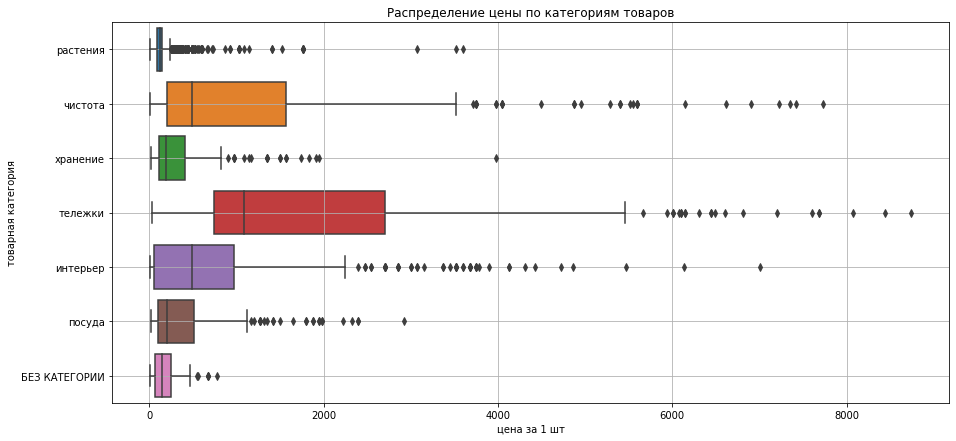

In [145]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'price', y = 'category', data = orders_new)
ax.set_title("Распределение цены по категориям товаров")
ax.set_xlabel("цена за 1 шт")
ax.set_ylabel("товарная категория")
plt.grid()
plt.show()

По графику видно что в категории "тележки" преобладают дорогие товары. А в растениях наоборот дешевые. Разделение данных категорий на основной и дополнительный ассортимент не целесообразно. Остальные же категории, разделим на основной и дополнительный ассортимент по цене. Выше медианы - основной, ниже - дополнительный.

Рассчитаем статистику для количества товаров в заказах по категориям и отобразим на графике

In [146]:
product_quantity = orders_new.groupby(['category', 'product'])['quantity'].count().reset_index().sort_values(by = 'quantity', ascending = False)
product_quantity.groupby(['category'])['quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
БЕЗ КАТЕГОРИИ,88.0,1.136364,0.433691,1.0,1.0,1.0,1.0,3.0
интерьер,529.0,1.775047,1.589639,1.0,1.0,1.0,2.0,17.0
посуда,252.0,1.214286,0.566068,1.0,1.0,1.0,1.0,5.0
растения,893.0,2.741321,4.728888,1.0,1.0,1.0,3.0,65.0
тележки,109.0,3.192661,5.107143,1.0,1.0,2.0,3.0,47.0
хранение,107.0,1.411215,0.999559,1.0,1.0,1.0,1.0,7.0
чистота,362.0,1.500000,1.151297,1.0,1.0,1.0,2.0,10.0


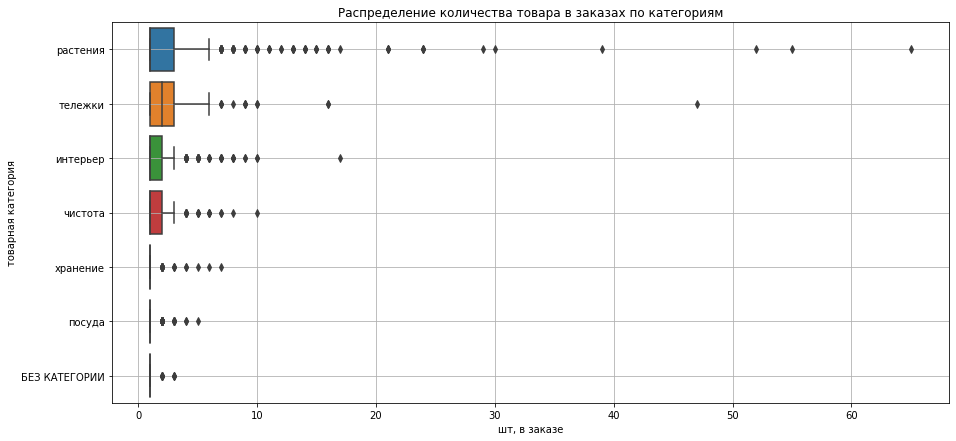

In [147]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(x = 'quantity', y = 'category', data = product_quantity)
ax.set_title("Распределение количества товара в заказах по категориям")
ax.set_xlabel("шт, в заказе")
ax.set_ylabel("товарная категория")
plt.grid()
plt.show()

По графику видно что в заказах преобладают товары по 1 штуке. Поэтому товары которые заказывают больше, чем в 75% случаев в категории, тоже отнесем к основному ассортименту. Для "посуды" и "хранения" это будет больше 1, а для "интерьера" и "чистоты" больше 2. 

Разделим товары на группы "оснровной" и "дополнительный", исходя из того что маржинальность продуктов в процентом отношении примерно одинакова и нам интересно продавать либо дорогие товары, либо много дешевых. 

In [148]:
for i in range(len(orders_new['category'])):
    if orders_new.loc[i,'category'] == 'растения':
        orders_new.loc[i,'type'] = 'основной'
    elif orders_new.loc[i,'category'] == 'тележки':
        orders_new.loc[i,'type'] = 'основной'
    elif (orders_new.loc[i,'category'] == 'посуда' and orders_new.loc[i,'price'] > 202):
        orders_new.loc[i,'type'] = 'основной'   
    elif (orders_new.loc[i,'category'] == 'интерьер' and orders_new.loc[i,'price'] > 487):
        orders_new.loc[i,'type'] = 'основной'     
    elif (orders_new.loc[i,'category'] == 'чистота' and orders_new.loc[i,'price'] > 487):
        orders_new.loc[i,'type'] = 'основной' 
    elif (orders_new.loc[i,'category'] == 'хранение' and orders_new.loc[i,'price'] > 188):
        orders_new.loc[i,'type'] = 'основной'
    elif (orders_new.loc[i,'category'] == 'посуда' and orders_new.loc[i,'quantity'] > 1):
        orders_new.loc[i,'type'] = 'основной'   
    elif (orders_new.loc[i,'category'] == 'интерьер' and orders_new.loc[i,'quantity'] > 2):
        orders_new.loc[i,'type'] = 'основной'     
    elif (orders_new.loc[i,'category'] == 'чистота' and orders_new.loc[i,'quantity'] > 2):
        orders_new.loc[i,'type'] = 'основной' 
    elif (orders_new.loc[i,'category'] == 'хранение' and orders_new.loc[i,'quantity'] > 1):
        orders_new.loc[i,'type'] = 'основной'
    else:
        orders_new.loc[i,'type'] = 'дополнительный'
orders_new.head()

,order_id,product,quantity,price,product_value,order_value,category,type
0,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,1037.0,растения,основной
1,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,1037.0,растения,основной
2,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,269.0,269.0,чистота,дополнительный
3,68483,"Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331",10,82.0,820.0,820.0,хранение,основной
4,68486,"Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027",96,38.0,3648.0,3648.0,хранение,основной


Сформируем статистику цены для получившихся категорий и групп товаров. 

In [149]:
orders_new.groupby(['category','type'])['price'].describe()

count         mean          std   min     25%  \
category      type                                                             
БЕЗ КАТЕГОРИИ дополнительный  100.0   198.300000   164.764877   11.0  67.00    
интерьер      дополнительный  324.0   191.308642   156.904786   9.0   59.00    
              основной        615.0   990.169106   962.800936   19.0  306.50   
посуда        дополнительный  75.0    112.800000   54.545047    22.0  59.50    
              основной        231.0   513.000000   531.426006   19.0  149.00   
растения      основной        2448.0  144.861520   175.641660   9.0   90.00    
тележки       основной        348.0   1934.063218  1721.088179  37.0  742.00   
хранение      дополнительный  34.0    124.705882   48.558324    15.0  115.75   
              основной        117.0   463.025641   570.886357   19.0  118.00   
чистота       дополнительный  200.0   245.210000   139.226816   14.0  132.25   
              основной        343.0   1526.405248  1456.330702  22.0  558.00   

                                 50%      75%     max  
category      type                                     
БЕЗ КАТЕГОРИИ дополнительный  149.0   248.75   779.0   
интерьер      дополнительный  149.0   299.00   487.0   
              основной        749.0   1255.50  7004.0  
посуда        дополнительный  104.0   156.50   202.0   
              основной        299.0   712.00   2924.0  
растения      основной        128.0   150.00   3599.0  
тележки       основной        1087.0  2699.00  8737.0  
хранение      дополнительный  127.0   162.25   188.0   
              основной        262.0   577.00   3974.0  
чистота       дополнительный  224.0   389.00   487.0   
              основной        1139.0  1949.00  7724.0

Рассчитаем сколько товаров попало в каждый из типов

In [150]:
orders_new.groupby(['type'])['product'].nunique()

type
дополнительный    501 
основной          1914
Name: product, dtype: int64

Отобразим на графиках распределение цены и количества товыаров в заказах с распределением по типу товаров

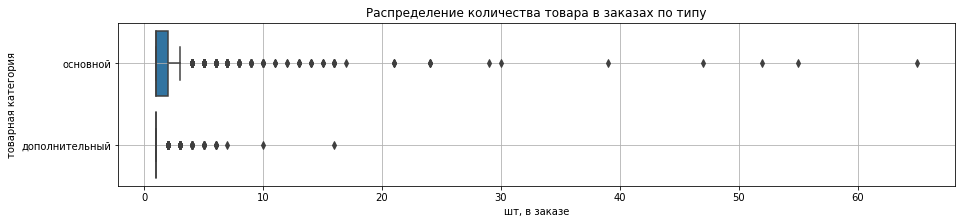

In [151]:
quantity = orders_new.groupby(['type', 'product'])['quantity'].count().reset_index().sort_values(by = 'quantity', ascending = False)

plt.figure(figsize=(15,3))
ax = sns.boxplot(x = 'quantity', y = 'type', data = quantity)
ax.set_title("Распределение количества товара в заказах по типу")
ax.set_xlabel("шт, в заказе")
ax.set_ylabel("товарная категория")
plt.grid()
plt.show()

In [152]:
product_type = orders_new.groupby(['type'])['price'].describe()

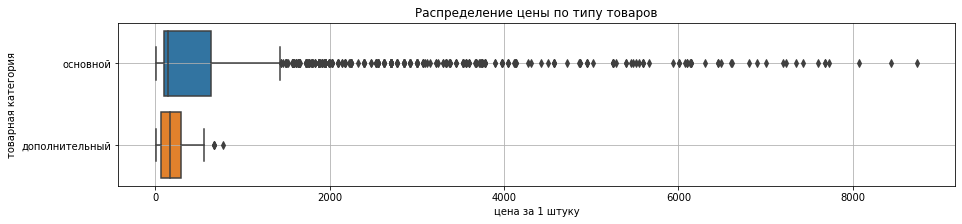

In [153]:
plt.figure(figsize=(15,3))
ax = sns.boxplot(x = 'price', y = 'type', data = orders_new)
ax.set_title("Распределение цены по типу товаров")
ax.set_xlabel("цена за 1 штуку")
ax.set_ylabel("товарная категория")
plt.grid()
plt.show()

### Вывод

Мы разделили 2340 уникальных наименований товаров на 6 категорий. 88 наименований товаров остались без категории.

Далее мы разделили товарный ассортимент на основной и дополнительный учитывая пренадлежность к категории, стоимость товара и колличество штук в заказах. 

Товары из категорий "тележки" и "растения" полностью относятся к основному ассортименту. 
Товары из категории "посуда" дороже 202 или которые заказывают в одном заказе более 1 штуки относятся к основному ассортименту. Для категории "хранение" это тиовары дороже 188 и более 1 штуки в заказе. Что бы товар из категории "интерьер" и "чистота" попал в основном ассортимент он должен стоить больше 487 или присутсвовать в заказах в колличестве более 2-х штук.

В основной ассортимент входит 1914 уникальных наименований товаров, в дополнительный 501 товар.

Средняя цена основного товара 568, дополнительного 195. При этом медианна цены основного товара составляет 150, а дополнительного 160.

## Проверка гипотез

Рассчитаем статистическую значимость различий в средней стоимости позиции между группами основного и дополнительного товарного ассортимента

Построим гистограммы что бы оценить характер распределения величин

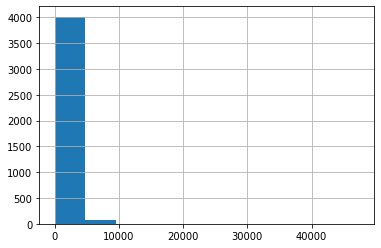

In [154]:
orders_new[orders_new['type']=='основной']['product_value'].hist()
plt.show()

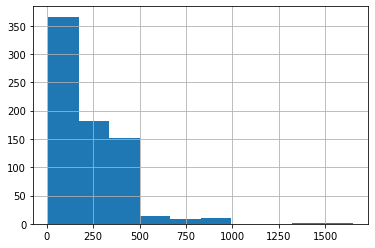

In [155]:
orders_new[orders_new['type']=='дополнительный']['product_value'].hist()
plt.show()

Распределения по внешнему виду отличаются от нормального. Здесь и далее для проверки гипотез будем исспользовать U-критерий Манна — Уитни, так как он менее требователен к исходным данным. 

Сформируем нулевую гипотезу: "Статистически значимых различий в средней стоимости позиции между группами нет", тогда альтернативной гипотезой будет то, что различия есть.

In [156]:
'{0:.3f}'.format(stats.mannwhitneyu(orders_new[orders_new['type']=='основной']['product_value'], 
                                    orders_new[orders_new['type']=='дополнительный']['product_value'])[1])

'0.000'

In [157]:
'{0:.3f}'.format(orders_new[orders_new['type']=='дополнительный']['product_value'].mean()/orders_new[orders_new['type']=='основной']['product_value'].mean()-1)

'-0.709'

p значение близко к 0, что меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в средней стоимости позиции между группами нет, отвергаем. Средняя стоимость позиции из группы "дополнительный" ниже средней стоимости позиции из группы "основной" на 70,9%

Сформируем нулевую гипотезу: "Статистически значимых различий в средней цене товара между группами нет", тогда альтернативной гипотезой будет то, что различия есть.

In [158]:
'{0:.3f}'.format(stats.mannwhitneyu(orders_new[orders_new['type']=='основной']['price'], 
                                    orders_new[orders_new['type']=='дополнительный']['price'])[1])

'0.000'

In [159]:
'{0:.3f}'.format(orders_new[orders_new['type']=='дополнительный']['price'].mean()/orders_new[orders_new['type']=='основной']['price'].mean()-1)

'-0.656'

p значение близко к 0, что меньше 0,05. Значит, нулевую гипотезу о том, что статистически значимых различий в средней цене товара между группами нет, отвергаем. Средняя цена товара из группы "дополнительный" ниже средней цена товара из группы "основной" на 65,6%

Рассчитаем статистическую значимость различий средней цены между категориями "хранение" и "посуда", используя U-критерий Манна — Уитни. Сформируем нулевую гипотезу: "Статистически значимых различий в средней стоимости позиции между категориями нет", тогда альтернативной гипотезой будет то, что различия есть.

In [160]:
'{0:.3f}'.format(stats.mannwhitneyu(orders_new[orders_new['category']=='посуда']['product_value'], orders_new[orders_new['category']=='хранение']['product_value'])[1])

'0.166'

In [161]:
'{0:.3f}'.format(orders_new[orders_new['category']=='хранение']['product_value'].mean()/orders_new[orders_new['category']=='посуда']['product_value'].mean()-1)

'0.294'

p значение равно 0.197, что больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в средней стоимости позиции между категория нет, принимаем. Относительные различия в цене по позиции составляют 29,4%

### Вывод

Проверка гипотез показала что есть статистически значимые различия в средней стоимости позиции между группами основного и дополнительного товарного ассортимента и она составляет 70,9% и есть статистически значимые различия в средней цене товара между группами основного и дополнительного товарного ассортимента и она составляет 65,6%.

А для категорий "хранение" и "посуда" различия в средней стоимости позиции статистически не значимы.

## Общий вывод и рекомендации

В ходе анализа товарного ассортимента нам удалось разделить 2340 уникальных наименований товаров на 6 категорий. 88 наименований товаров остались без категории.

Далее мы разделили товарный ассортимент на основной и дополнительный учитывая принадлежность к категории, стоимость товара и колличество штук в заказах. 
В основной ассортимент вошли 1914 уникальных наименований товаров, а в дополнительный - 501 товар.

Средняя цена основного товара 568, дополнительного 195. При этом медиана цены основного товара составляет 150, а дополнительного 160.

Проверка гипотез показала что есть статистически значимые различия в средней стоимости позиции между товарами основного и дополнительного ассортимента и она составляет 70,9%, а так же есть статистически значимые различия в средней цене товара между группами основного и дополнительного товарного ассортимента и она составляет 65,6%

Разделение товаров на категории и типы позволить грамотно планировать дальнейшие закупки(нет смысла закупать много дополнительного товара, когда нет основного), а так же предлагать покупателям дополнительные товары из соответствующей категории. 

При появление новых товаров в ассортименте интернет-магазина, их нужно классифицировать используя текущую классификацию. 

Так же в ходе исследования были обнаружены дубликаты. Необходимо разобраться, в чем именно заключается ошибка и как ее не допустить в будущих периодах. 